In [13]:
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.naive_bayes import GaussianNB
df = pd.read_csv('./data/processed_data/matches_sorted.csv')

In [3]:
# removes the index column
df.drop(df.columns[0], axis=1, inplace=True)

# removes rows with Null / Nan values
df.dropna(inplace=True)

# replace win with boolean
df['win'].replace({1: True, 0: False}, inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.4, random_state=0)

print(f"Training data length: {len(X_train)}")
print(f"Test data lenght: {len(X_test)}")
print(f"Sum: {len(X_test) + len(X_train)}")

Training data length: 93806
Test data lenght: 62538
Sum: 156344


In [5]:
models = [
    GaussianNB(),
    tree.DecisionTreeClassifier(min_samples_split=10, criterion='entropy'),
    RandomForestClassifier(),
    LogisticRegression(solver='liblinear', max_iter=500, random_state=0)
]

model_times = [0.0, 0.0, 0.0, 0.0]
model_accuracies = [0.0, 0.0, 0.0, 0.0]

for index, model in enumerate(models):
    print(type(model).__name__)
    start_time = time()

    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    model_time = time() - start_time
    model_times[index] = model_time

    acc = accuracy_score(y_test, predicted)
    model_accuracies[index] = acc

    print(f'Test accuracy score: {acc}')
    print(f'Time: {model_time}')

GaussianNB
Test accuracy score: 0.7788064856567207
Time: 1.225576400756836
DecisionTreeClassifier
Test accuracy score: 0.7666698647222489
Time: 43.46630668640137
RandomForestClassifier
Test accuracy score: 0.8158079887428443
Time: 135.91956901550293
LogisticRegression
Test accuracy score: 0.8227477693562314
Time: 397.3680703639984


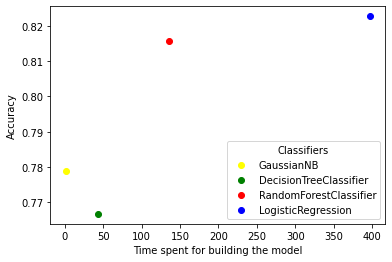

In [43]:
model_names = [type(model).__name__ for model in models]

fix, ax = plt.subplots()
ax.set_ylabel('Accuracy')
ax.set_xlabel('Time spent for building the model')
colors = ['yellow', 'green', 'red', 'blue']

scatters = []
for model_time, model_accuracy, color in zip(model_times, model_accuracies, range(0, 4)):
    scatters.append(ax.scatter(model_time, model_accuracy, c=colors[color]))

legend = ax.legend(scatters, model_names, title='Classifiers')

plt.savefig('figs/time_comparison.png')
plt.show()